In [1]:
import pandas as pd


In [5]:
df = pd.read_csv("Books_df.csv")

In [66]:
"""Sustituimos los espacios por '_', los ':' por nada y el 'no.' por 'num; y colocamos todo en minusculas"""
df.columns = df.columns.str.replace(" ","_").str.lower().str.replace("no.","num").str.replace(":","")

In [7]:
df

,unnamed_0,title,author,main_genre,sub_genre,type,price,rating,num_of_people_rated,urls
0,0,The Complete Novel of Sherlock Holmes,Arthur Conan Doyle,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹169.00,4.4,19923.0,https://www.amazon.in/Complete-Novels-Sherlock...
1,1,Black Holes (L) : The Reith Lectures [Paperbac...,Stephen Hawking,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹99.00,4.5,7686.0,https://www.amazon.in/Black-Holes-Lectures-Ste...
2,2,The Kite Runner,Khaled Hosseini,"Arts, Film & Photography",Cinema & Broadcast,Kindle Edition,₹175.75,4.6,50016.0,https://www.amazon.in/Kite-Runner-Khaled-Hosse...
3,3,Greenlights: Raucous stories and outlaw wisdom...,Matthew McConaughey,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹389.00,4.6,32040.0,https://www.amazon.in/Greenlights-Raucous-stor...
4,4,The Science of Storytelling: Why Stories Make ...,Will Storr,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹348.16,4.5,1707.0,https://www.amazon.in/Science-Storytelling-Wil...
...,...,...,...,...,...,...,...,...,...,...
7923,7923,Insight Guides Poland (Travel Guide with Free ...,Insight Travel Guide,Travel,Travel & Holiday Guides,Paperback,"₹1,326.00",4.7,16.0,https://www.amazon.in/Insight-Guides-Poland-Tr...
7924,7924,Lonely Planet India 19 (Travel Guide),Anirban Mahapatra,Travel,Travel & Holiday Guides,Paperback,₹850.00,4.4,187.0,https://www.amazon.in/Lonely-Planet-India-Trav...
7925,7925,Eyewitness Travel Phrase Book French (EW Trave...,DK,Travel,Travel & Holiday Guides,Paperback,₹307.00,4.5,168.0,https://www.amazon.in/Eyewitness-Travel-Phrase...
7926,7926,Lonely Planet Australia (Travel Guide),Andrew Bain,Travel,Travel & Holiday Guides,Kindle Edition,"₹1,814.50",4.7,267.0,https://www.amazon.in/Lonely-Planet-Australia-...


In [90]:
df.dtypes

unnamed_0                int64
title                   object
author                  object
main_genre              object
sub_genre               object
type                    object
price                   object
rating                 float64
num_of_people_rated    float64
urls                    object
dtype: object

In [11]:
"""Creamos una función con la que utilizando API buscamos datos para crear diferentes columnas como: año de publicación e isbn"""
import requests
def buscar_libros(titulo):
    
    base_url = "https://openlibrary.org/search.json"
    params = {'title': titulo}
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        libros = data.get('docs', [])
        resultados = []
        for libro in libros:
            resultados.append({
            'titulo': libro.get('title'),
            'autor': libro.get('author_name', ['Desconocido'])[0],
            'isbn': libro.get('isbn', [None])[0],
            'año_publicacion': libro.get('publish_year', [None])[0]
            })
        
        return resultados
    else:
        return f"Error en la búsqueda: código de estado {response.status_code}"
    
for i in range (0,len(df)):
    try:
        autor = buscar_libros(df["title"][i])[0]['autor']
        df.loc[i, 'autor_api'] = autor
    
        year_public = buscar_libros(df["title"][i])[0]['año_publicacion']
        df.loc[i, 'year_public'] = year_public

        isbn = buscar_libros(df["title"][i])[0]['isbn']
        df.loc[i, 'isbn'] = isbn
    except:
        None 

"""
def buscar_libros_por_titulo(titulo):
    
    base_url = "https://openlibrary.org/search.json"
    params = {'title': titulo}
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        libros = data.get('docs', [])
        resultados = []
        for libro in libros:
            resultados.append({
            'titulo': libro.get('title'),
            'autor': libro.get('author_name', ['Desconocido'])[0],
            'isbn': libro.get('isbn', [None])[0],
            'año_publicacion': libro.get('publish_year', [None])[0]
            })
        
        return resultados
    else:
        return f"Error en la búsqueda: código de estado {response.status_code}"

    resultados = buscar_libros_por_titulo(titulo)
    resultados_con_similitud = []

    for libro in resultados:
        similitud = calcular_similitud(titulo, libro['titulo'])
        if similitud >= 0.80:
            libro['similitud'] = similitud
            resultados_con_similitud.append(libro)

    return resultados_con_similitud
    """

'\ndef buscar_libros_por_titulo(titulo):\n    \n    base_url = "https://openlibrary.org/search.json"\n    params = {\'title\': titulo}\n    response = requests.get(base_url, params=params)\n    if response.status_code == 200:\n        data = response.json()\n        libros = data.get(\'docs\', [])\n        resultados = []\n        for libro in libros:\n            resultados.append({\n            \'titulo\': libro.get(\'title\'),\n            \'autor\': libro.get(\'author_name\', [\'Desconocido\'])[0],\n            \'isbn\': libro.get(\'isbn\', [None])[0],\n            \'año_publicacion\': libro.get(\'publish_year\', [None])[0]\n            })\n        \n        return resultados\n    else:\n        return f"Error en la búsqueda: código de estado {response.status_code}"\n\n    resultados = buscar_libros_por_titulo(titulo)\n    resultados_con_similitud = []\n\n    for libro in resultados:\n        similitud = calcular_similitud(titulo, libro[\'titulo\'])\n        if similitud >= 0.80:\n

In [132]:
df

,title,author,main_genre,sub_genre,type,price,rating,num_of_people_rated,autor_api,year_public,isbn,price_euro
0,The Complete Novel of Sherlock Holmes,Arthur Conan Doyle,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹169.00,4.4,19923.0,Arthur Conan Doyle,2017.0,8175994312,1.892800
1,The Kite Runner,Khaled Hosseini,"Arts, Film & Photography",Cinema & Broadcast,Kindle Edition,₹175.75,4.6,50016.0,Khaled Hosseini,2016.0,0756948800,1.968400
2,Fantastic Beasts and Where to Find Them: The O...,J.K. Rowling,"Arts, Film & Photography",Cinema & Broadcast,Kindle Edition,₹313.95,4.5,15122.0,J. K. Rowling,2016.0,0606396683,3.516240
3,Screenplay,Syd Field,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹644.52,4.5,3216.0,J. K. Rowling,2016.0,0606396683,7.218624
4,One Day,David Nicholls,"Arts, Film & Photography",Cinema & Broadcast,Audible Audiobook,₹892.00,4.2,10550.0,Arnold Bennett,1925.0,9780341688341,9.990400
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Lucky Hit,Hannah Cowan,Sports,Winter Sports,Paperback,₹891.00,4.1,6332.0,Hannah Cowan,2020.0,9798670001274,9.979200
1230,Running Wild,K.A. Tucker,Sports,Winter Sports,Paperback,₹341.06,4.5,6233.0,Alison Fraser,1996.0,9780263795752,3.819872
1231,Knight of the Ice 11,Yayoi Ogawa,Sports,Winter Sports,Paperback,₹277.63,4.5,18.0,Yayoi Ogawa,2022.0,9781646510887,3.109456
1232,The People of the Indus,Nikhil Gulati,Teen & Young Adult,Biographies,Hardcover,₹407.00,4.4,250.0,Nikhil Gulati,2022.0,014345532X,4.558400


In [35]:
df_origin = df.copy()

In [36]:
df_origin.to_csv("df_origin.csv")

In [33]:
"""Eliminar los valores nulos encontrados"""
df.dropna(subset=["year_public"])

In [23]:
#Hacemos el cambio de moneda de rupias a euros
from alpha_vantage.foreignexchange import ForeignExchange
fx = ForeignExchange(key='DCS1WH0CF5CDB755')
data, _ = fx.get_currency_exchange_rate(from_currency='INR', to_currency='EUR')
print(data)

{'1. From_Currency Code': 'INR', '2. From_Currency Name': 'Indian Rupee', '3. To_Currency Code': 'EUR', '4. To_Currency Name': 'Euro', '5. Exchange Rate': '0.01120000', '6. Last Refreshed': '2024-04-25 08:23:41', '7. Time Zone': 'UTC', '8. Bid Price': '0.01119000', '9. Ask Price': '0.01120000'}


In [24]:
exchange = data['5. Exchange Rate']

In [37]:
#nueva columna con el precio en euros
df['price_euro']= (df['price'].str.replace("₹", "").str.replace(",", "").astype(float))*float(exchange)

In [69]:
#Eliminar las columnas 'unnamed_0' y 'urls'
df = df.drop("unnamed_0", axis=1)

In [70]:
df

,title,author,main_genre,sub_genre,type,price,rating,num_of_people_rated,autor_api,year_public,isbn,price_euro
0,The Complete Novel of Sherlock Holmes,Arthur Conan Doyle,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹169.00,4.4,19923.0,Arthur Conan Doyle,2017.0,8175994312,1.892800
1,The Kite Runner,Khaled Hosseini,"Arts, Film & Photography",Cinema & Broadcast,Kindle Edition,₹175.75,4.6,50016.0,Khaled Hosseini,2016.0,0756948800,1.968400
2,Fantastic Beasts and Where to Find Them: The O...,J.K. Rowling,"Arts, Film & Photography",Cinema & Broadcast,Kindle Edition,₹313.95,4.5,15122.0,J. K. Rowling,2016.0,0606396683,3.516240
3,Screenplay,Syd Field,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹644.52,4.5,3216.0,J. K. Rowling,2016.0,0606396683,7.218624
4,One Day,David Nicholls,"Arts, Film & Photography",Cinema & Broadcast,Audible Audiobook,₹892.00,4.2,10550.0,Arnold Bennett,1925.0,9780341688341,9.990400
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Lucky Hit,Hannah Cowan,Sports,Winter Sports,Paperback,₹891.00,4.1,6332.0,Hannah Cowan,2020.0,9798670001274,9.979200
1230,Running Wild,K.A. Tucker,Sports,Winter Sports,Paperback,₹341.06,4.5,6233.0,Alison Fraser,1996.0,9780263795752,3.819872
1231,Knight of the Ice 11,Yayoi Ogawa,Sports,Winter Sports,Paperback,₹277.63,4.5,18.0,Yayoi Ogawa,2022.0,9781646510887,3.109456
1232,The People of the Indus,Nikhil Gulati,Teen & Young Adult,Biographies,Hardcover,₹407.00,4.4,250.0,Nikhil Gulati,2022.0,014345532X,4.558400


In [18]:
import plotly.express as px

In [73]:
#Grafico circular de Tipos de Formatos 
df_count_type = df["type"].value_counts().reset_index()
fig = px.pie(df_count_type, values='count', names='type', title='Top tipos de formatos de lectura', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [131]:
df_genre =df[['main_genre', 'sub_genre']].value_counts().reset_index().head(15)
fig = px.bar(df_genre, x='main_genre', y="count", color='sub_genre',
             title='Top 15 most read genres')
fig.show()

c:\Users\andre\anaconda3\envs\envproject\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [129]:
import plotly.express as px
fig = px.violin(df, y="rating", x="main_genre", box=True, points="all", hover_data=df.columns)
# Adjust the layout
fig.update_layout(
    height=800,  # Set the height of the graph
    width=1200   # Set the width of the graph
)
fig.show()

In [130]:
import plotly.express as px
fig = px.scatter(df, x="num_of_people_rated", y="rating", size="price_euro", color="main_genre",
           hover_name="title", log_x=True)
fig.show()

c:\Users\andre\anaconda3\envs\envproject\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [96]:
import matplotlib.pyplot as plt

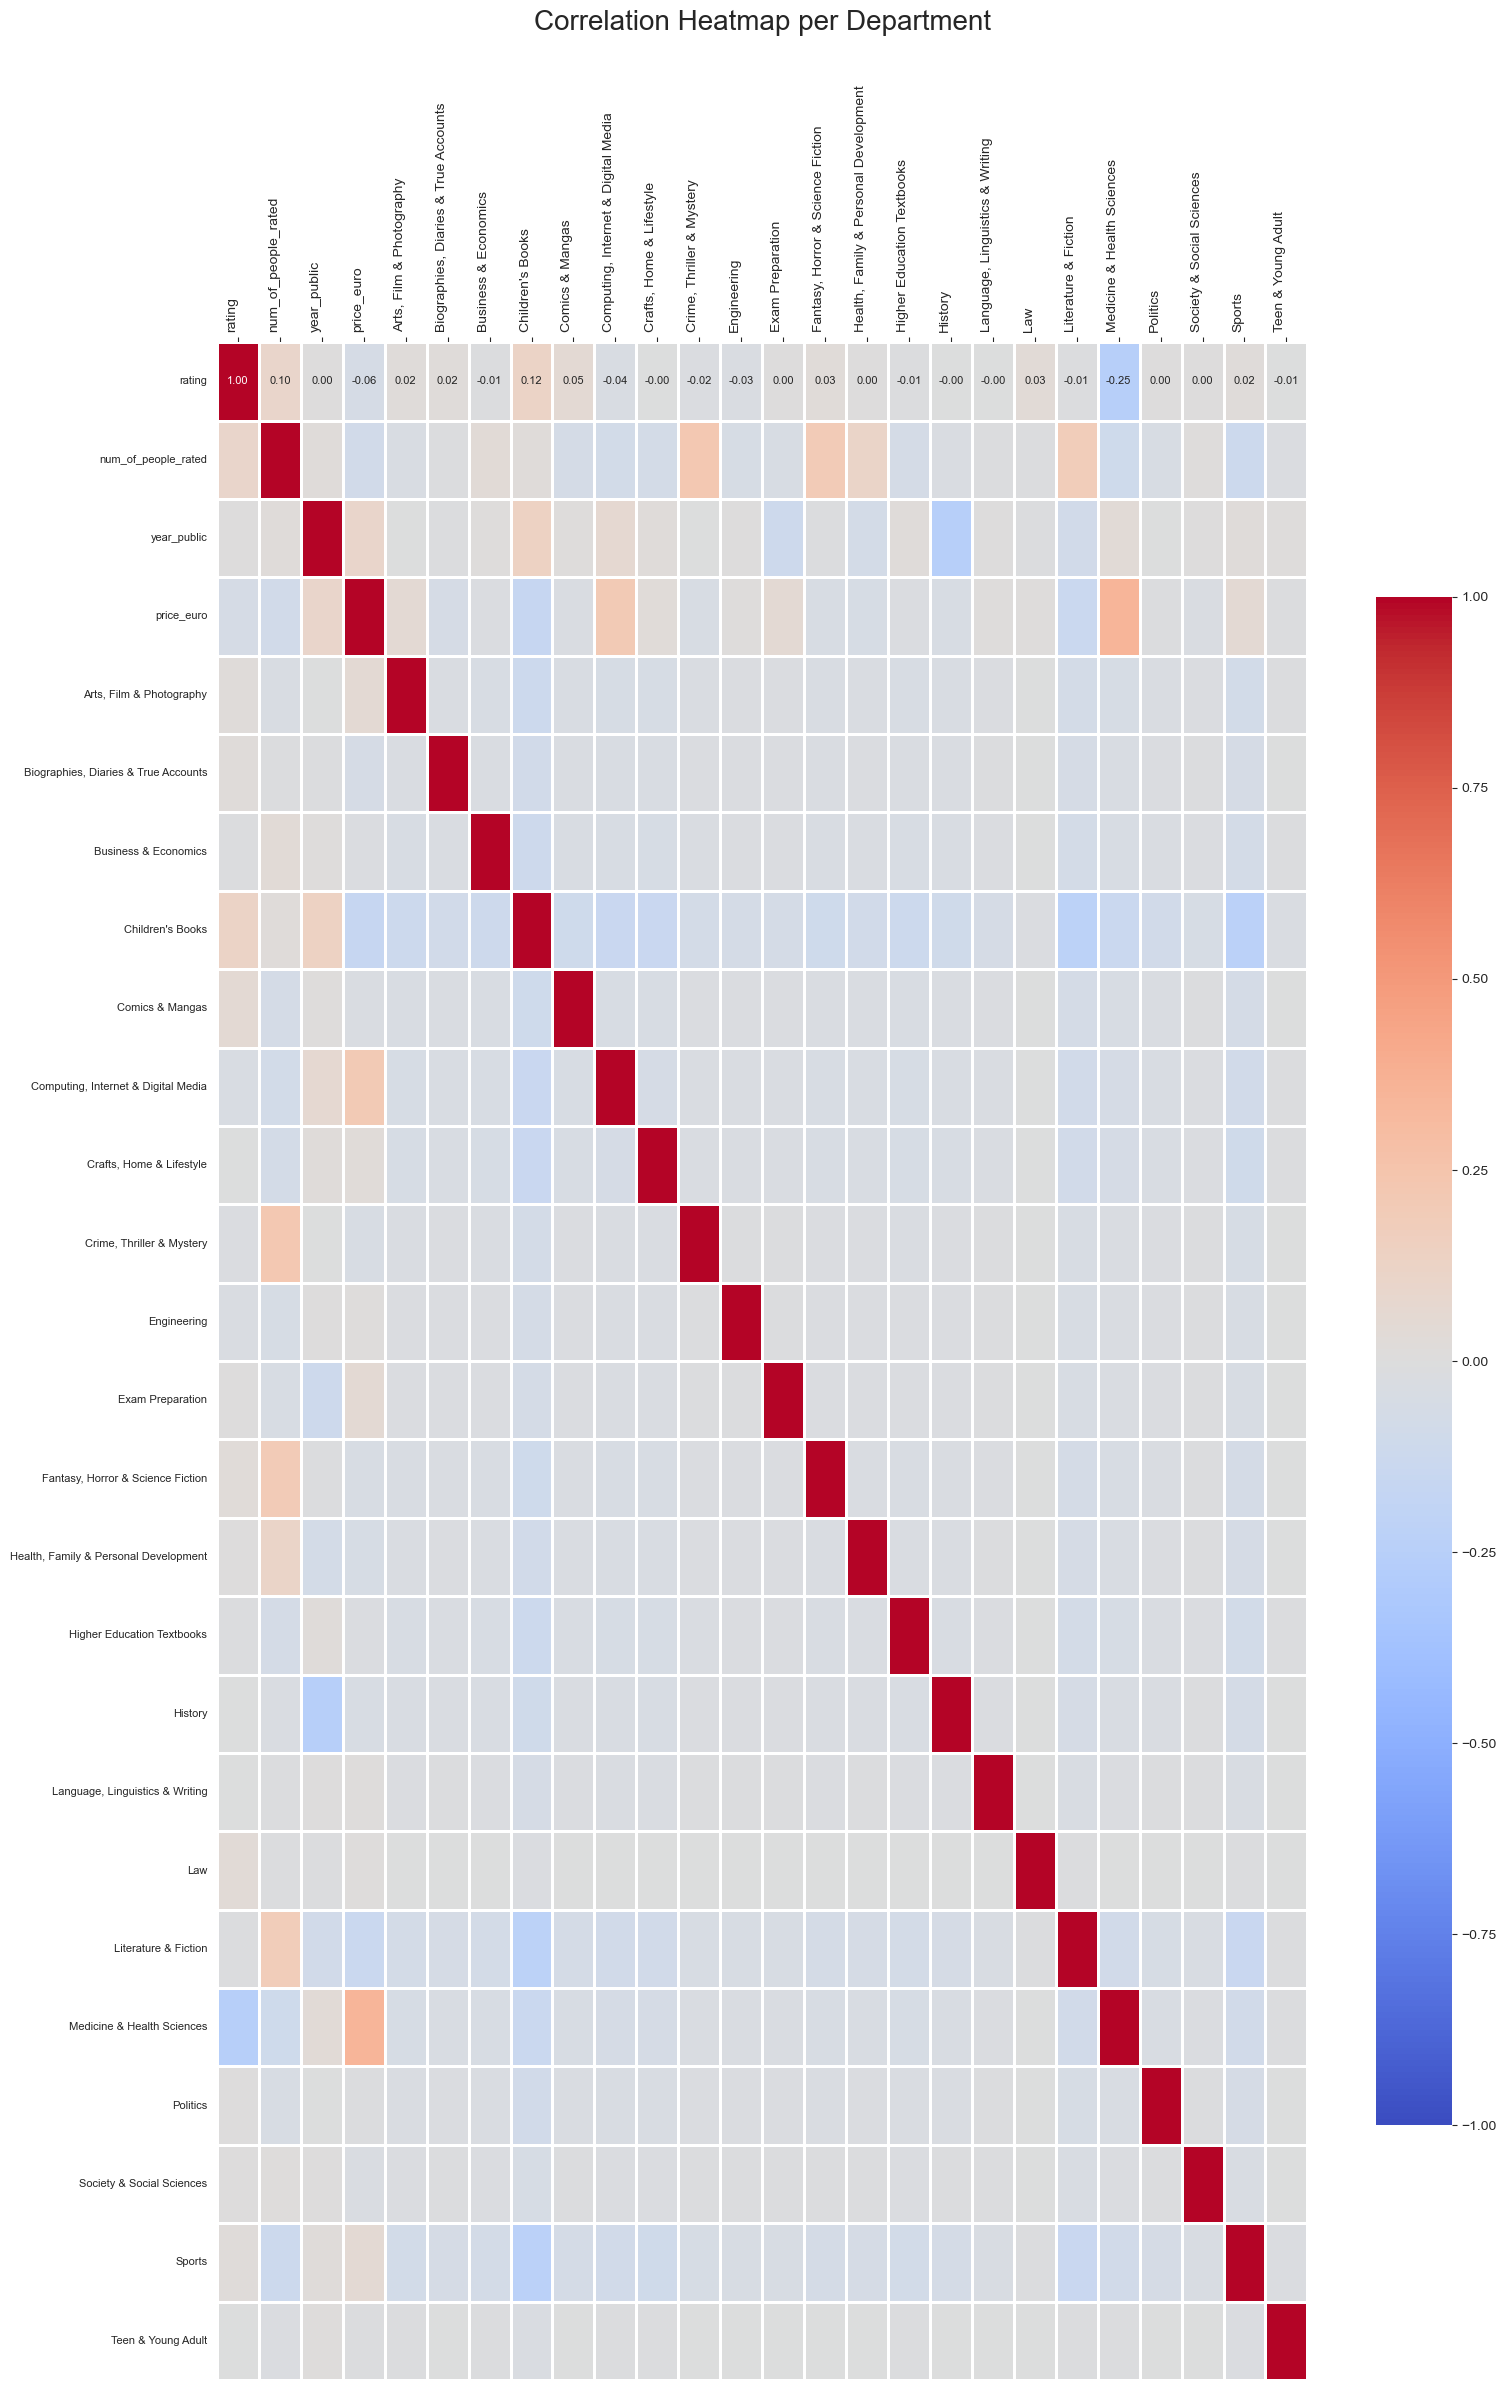

In [102]:
# Grafico de toda la tabla
# Visualization
df_corr.select_dtypes([int, bool, float]).corr()
sns.set_style("whitegrid")
plt.figure(figsize=(16, 24))  # Adjusted the size for a vertical orientation
heatmap = sns.heatmap(df_corr.select_dtypes([int, bool, float]).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=1, linecolor='white',
            cbar_kws={"shrink": 0.75}, fmt=".2f", annot_kws={"size": 8})  # Reduced annot size for better fit
heatmap.xaxis.set_ticks_position('top')  # Set the X-axis labels on top
plt.title('Correlation Heatmap per Department', fontsize=20, pad=40)  # Adjusted padding to accommodate top x-labels
plt.xticks(fontsize=10, rotation=90, ha='right')
plt.yticks(fontsize=8, rotation=0)
plt.tight_layout()
plt.show()

In [49]:
df = pd.read_csv('df.csv')

In [110]:
df.to_csv('df.csv')

In [92]:
df_gender = pd.get_dummies(df['main_genre'])
df_corr = df.merge(df_gender, how="left", left_index=True, right_index=True)
df_corr.select_dtypes([int, bool, float])

c:\Users\andre\anaconda3\envs\web_scrapping\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andre\anaconda3\envs\web_scrapping\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andre\anaconda3\envs\web_scrapping\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andre\anaconda3\envs\web_scrapping\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

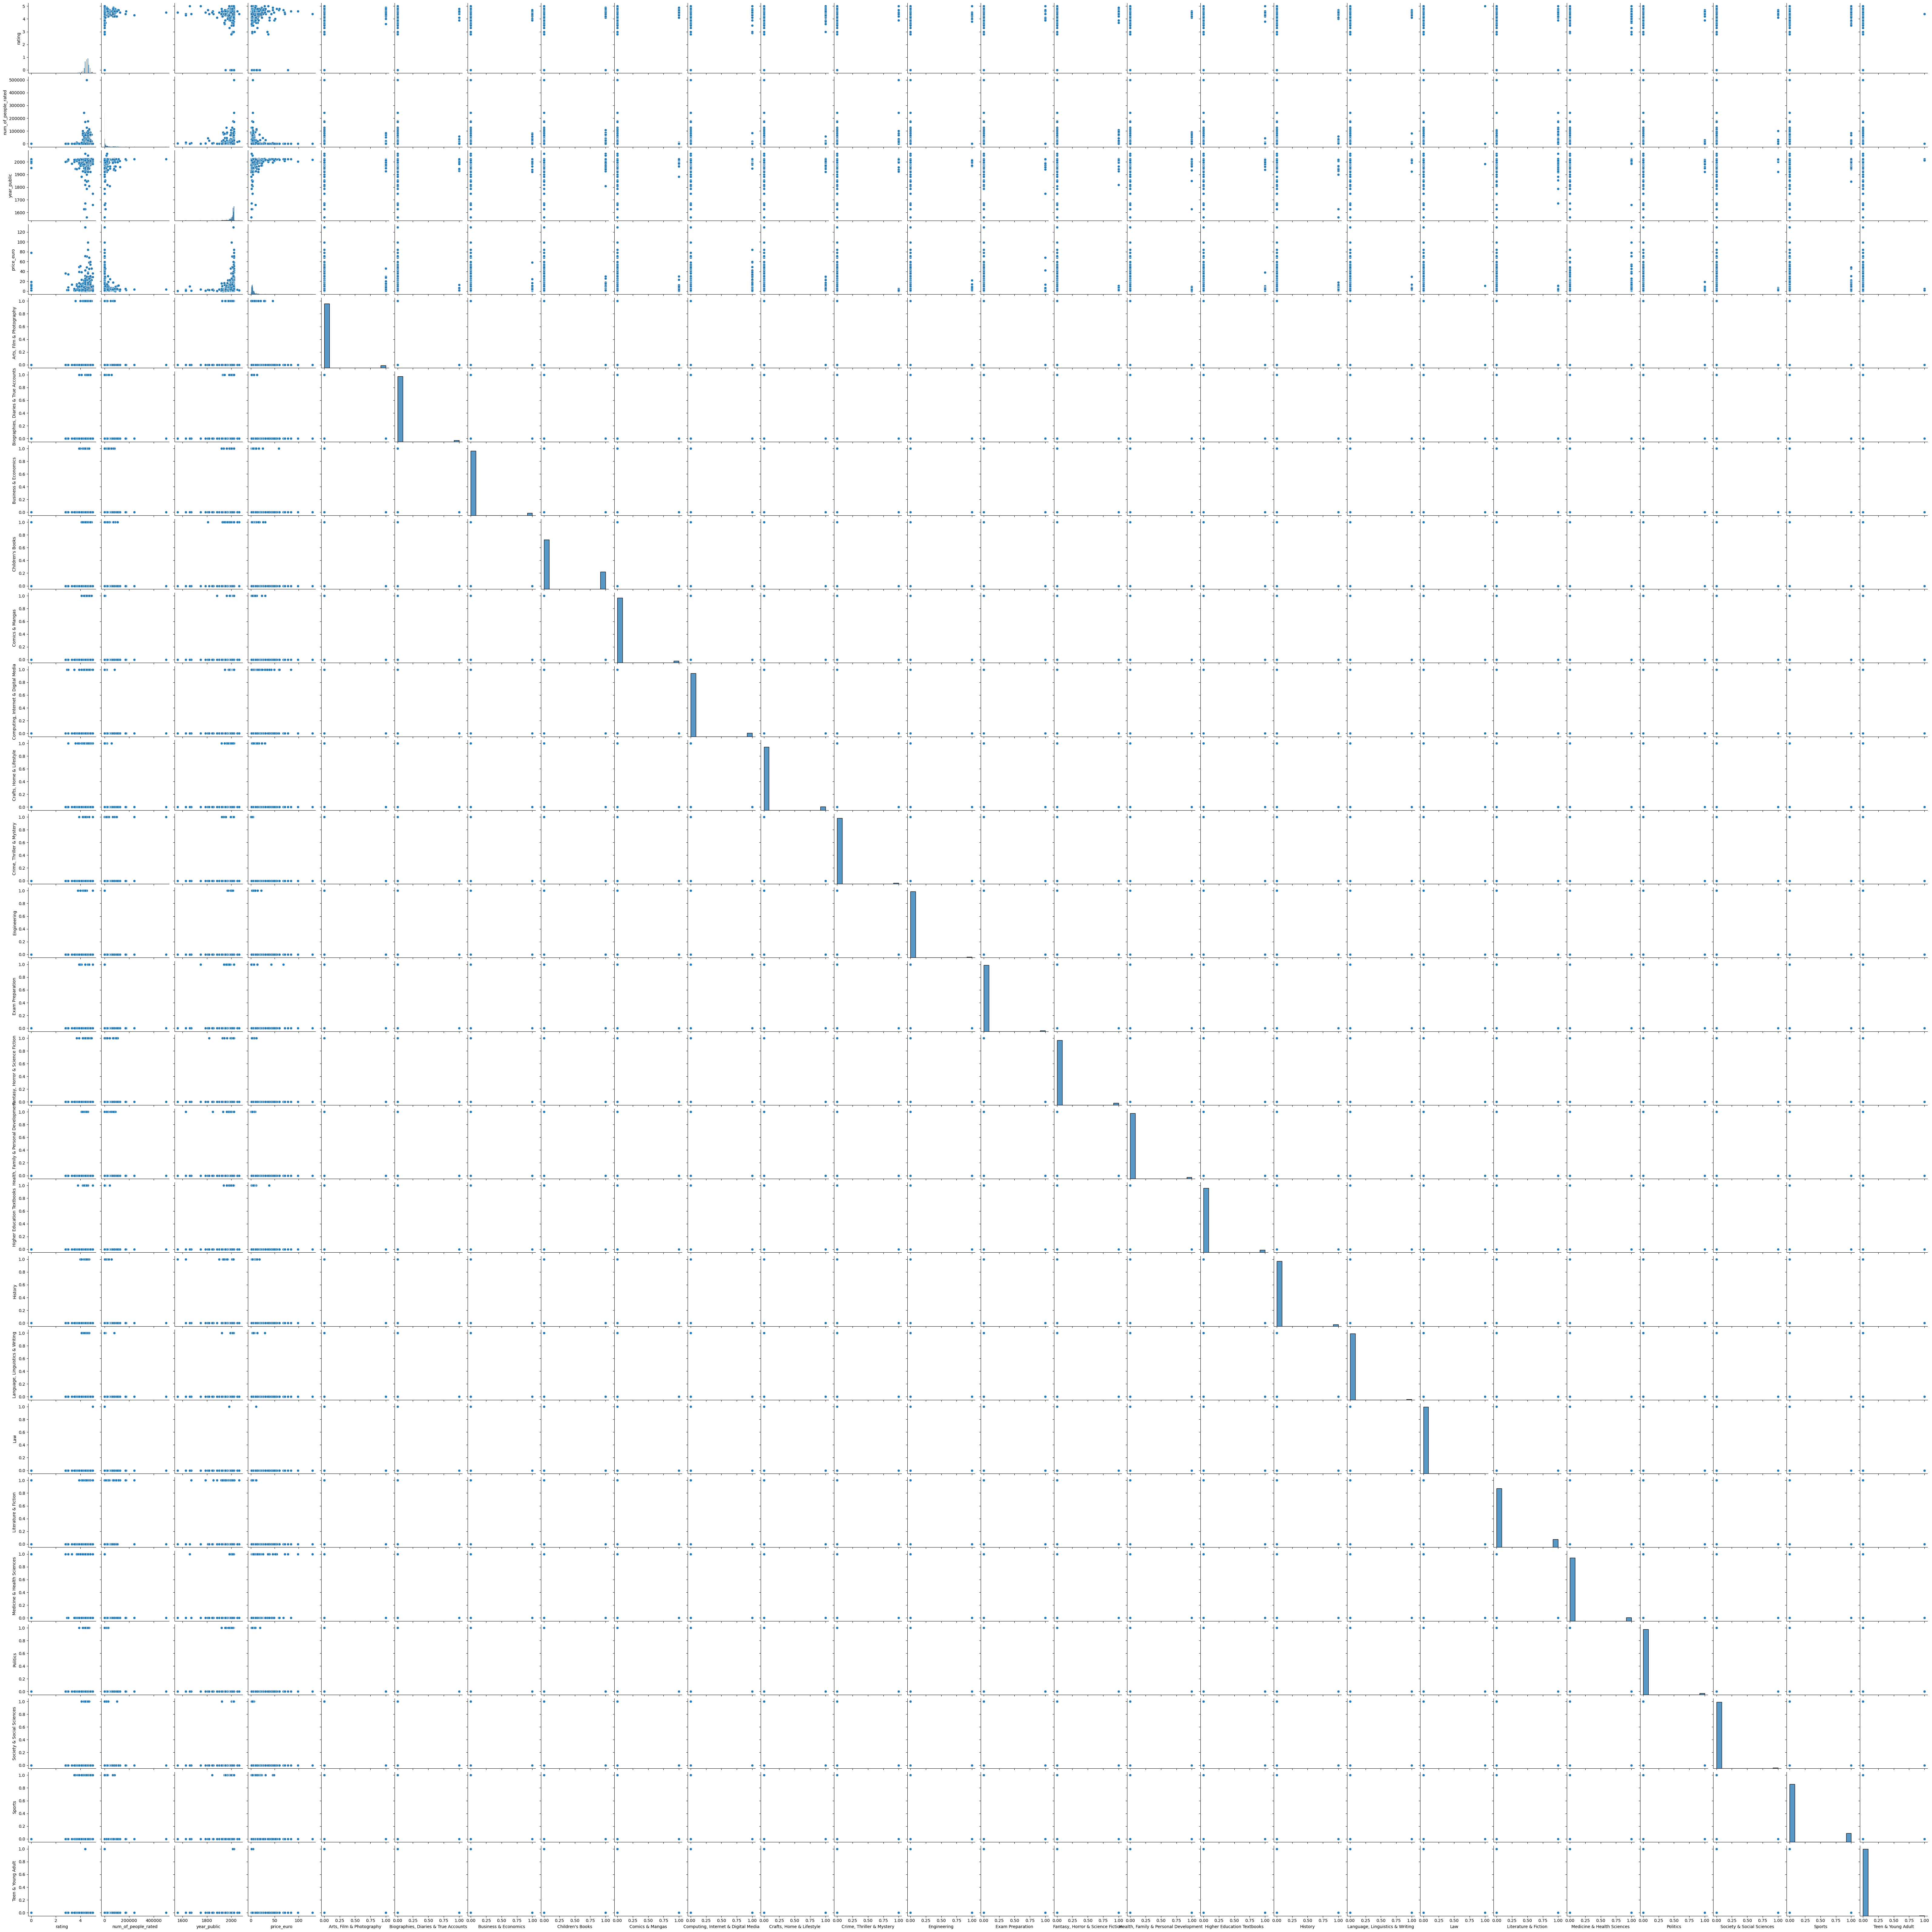

In [95]:
# Uso de tabla de toda la tabla
import seaborn as sns
sns.pairplot(df_corr.select_dtypes([int, bool, float]))